In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
raw_data=pd.read_csv('data.csv')
raw_data.head()

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.7,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184


In [178]:
# basic understanding of data
raw_data.info()
# we can clearly avoid the option to drop na as their only exist in temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   datetime                  8708 non-null   object 
 1   season                    8708 non-null   object 
 2   holiday                   8708 non-null   int64  
 3   workingday                8708 non-null   int64  
 4   weather                   8708 non-null   object 
 5   temp                      8705 non-null   object 
 6   humidity                  8708 non-null   int64  
 7   windspeed                 8708 non-null   float64
 8   total number of bookings  8708 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 612.4+ KB


In [179]:
raw_data.drop_duplicates(inplace=True)

In [180]:
#unique values in-order to see any discrepency in the data and find out categorical data
for i in raw_data.columns:
    print('*****'*10)
    print(i,'===',raw_data[i].value_counts().index)

**************************************************
datetime === Index(['8/15/2011 15:00', '5/3/2011 8:00', '2/4/2012 14:00', '7/6/2012 2:00',
       '5/5/2012 13:00', '10/6/2011 19:00', '5/12/2012 23:00', '4/5/2012 9:00',
       '7/19/2012 22:00', '1/19/2012 19:00',
       ...
       '12/5/2011 2:00', '3/8/2012 9:00', '3/13/2011 7:00', '12/15/2012 4:00',
       '9/3/2012 23:00', '10/11/2011 1:00', '11/6/2012 13:00',
       '9/16/2012 2:00', '7/1/2012 22:00', '12/12/2012 4:00'],
      dtype='object', length=8708)
**************************************************
season === Index(['Summer', 'Fall', 'Winter', 'Spring', 'Sumer', 'Fal', 'wintr'], dtype='object')
**************************************************
holiday === Int64Index([0, 1], dtype='int64')
**************************************************
workingday === Int64Index([1, 0], dtype='int64')
**************************************************
weather === Index([' Clear + Few clouds', ' Mist + Cloudy ', ' Light Snow, Light Rain

In [181]:
#fixing values in the season column   
raw_data['season']=raw_data['season'].str.replace('wintr','Winter')
raw_data['season']=raw_data['season'].str.replace('Sumer','Summer')
raw_data['season']=raw_data['season'].apply(lambda x:'Fall' if x=='Fal' else x)

In [216]:
#for regression problem we need date time as ordinal
from datetime import datetime as dt

#seprating date and time from datetime column
raw_data['hours']=raw_data.datetime.apply(lambda x:x.split()[1].split(':')[0])
raw_data['date']=raw_data.datetime.apply(lambda x:x.split()[0])

#getting month,weekday,year
raw_data['year']=pd.DatetimeIndex(raw_data['date']).year
raw_data['month']=pd.DatetimeIndex(raw_data['date']).month
raw_data['weekday']=raw_data.date.apply(lambda dateString : dt.strptime(dateString,"%m/%d/%Y").weekday())

In [217]:
raw_data.head(10)

,datetime,season,holiday,workingday,weather,temp,humidity,windspeed,total number of bookings,hours,date,year,month,weekday
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,504,19,5/2/2012,2012,5,2
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.7,79,19.0012,5,4,9/5/2012,2012,9,2
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,139,9,1/13/2011,2011,1,3
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,209,16,11/18/2011,2011,11,4
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,184,13,9/13/2011,2011,9,1
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,36,22.0028,791,17,8/17/2012,2012,8,4
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.6,73,12.9980,395,9,10/6/2012,2012,10,5
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,68,19.0012,5,4,9/10/2012,2012,9,0
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,61,7.0015,9,4,7/14/2012,2012,7,5
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.3,56,11.0014,78,18,2/6/2011,2011,2,6


In [219]:
#removing the datetime columns
del raw_data['datetime']
#year has only 2 values 2012 & 2011 so remove it 
del raw_data['year']

In [225]:
raw_data=raw_data.reindex(columns=['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'hours',
 'date',
 'month',
 'weekday','total number of bookings'],)
#rename to output_nob
raw_data.rename(columns={'total number of bookings':'output_nob'},inplace=True)
raw_data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,hours,date,month,weekday,output_nob
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,19,5/2/2012,5,2,504
1,Fall,0,1,Clear + Few clouds,28.7,79,19.0012,4,9/5/2012,9,2,5
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,9,1/13/2011,1,3,139
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,16,11/18/2011,11,4,209
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,13,9/13/2011,9,1,184


In [227]:
#base cleaning done save to new data
raw_data.to_csv('cleaned_data.csv',index=False)

In [230]:
clean_data=pd.read_csv('cleaned_data.csv')
clean_data.head()

,season,holiday,workingday,weather,temp,humidity,windspeed,hours,date,month,weekday,output_nob
0,Summer,0,1,Clear + Few clouds,22.14,77,16.9979,19,5/2/2012,5,2,504
1,Fall,0,1,Clear + Few clouds,28.7,79,19.0012,4,9/5/2012,9,2,5
2,Spring,0,1,Clear + Few clouds,5.74,50,22.0028,9,1/13/2011,1,3,139
3,Winter,0,1,Clear + Few clouds,13.94,29,8.9981,16,11/18/2011,11,4,209
4,Fall,0,1,Clear + Few clouds,30.34,51,19.0012,13,9/13/2011,9,1,184


In [235]:
def cont_cat_split(df,limit):
    continous_columns=[]
    category_columns=[]
    for i in df.columns[:-1]:
        print('{}--unique--{}'.format(i,df[i].nunique()))
        if df[i].nunique()>=limit or df[i].dtype=='float64':
            continous_columns.append(i)
        else:
            category_columns.append(i)
    
    #adding the output_nob as well
    category_columns.append(df.columns[-1])
    continous_columns.append(df.columns[-1])
    
    return (continous_columns,category_columns)

continous_columns,category_columns=cont_cat_split(clean_data,60)

print(continous_columns,category_columns)



#continous data-output
continous_data=clean_data[continous_columns]


#cat data-output
category_data=clean_data[category_columns]

season--unique--4
holiday--unique--2
workingday--unique--2
weather--unique--4
temp--unique--55
humidity--unique--88
windspeed--unique--28
hours--unique--24
date--unique--456
month--unique--12
weekday--unique--7
['humidity', 'windspeed', 'date', 'output_nob'] ['season', 'holiday', 'workingday', 'weather', 'temp', 'hours', 'month', 'weekday', 'output_nob']


# analysis of continous data

In [236]:
continous_data.describe()

,humidity,windspeed,output_nob
count,8708.000000,8708.000000,8708.000000
mean,61.649173,12.843891,193.007005
std,19.199578,8.190314,181.552211
min,0.000000,0.000000,1.000000
25%,46.000000,7.001500,43.000000
50%,61.000000,12.998000,148.000000
75%,77.000000,16.997900,286.000000
max,100.000000,56.996900,977.000000


In [237]:
continous_data.isnull().sum()

humidity      0
windspeed     0
date          0
output_nob    0
dtype: int64

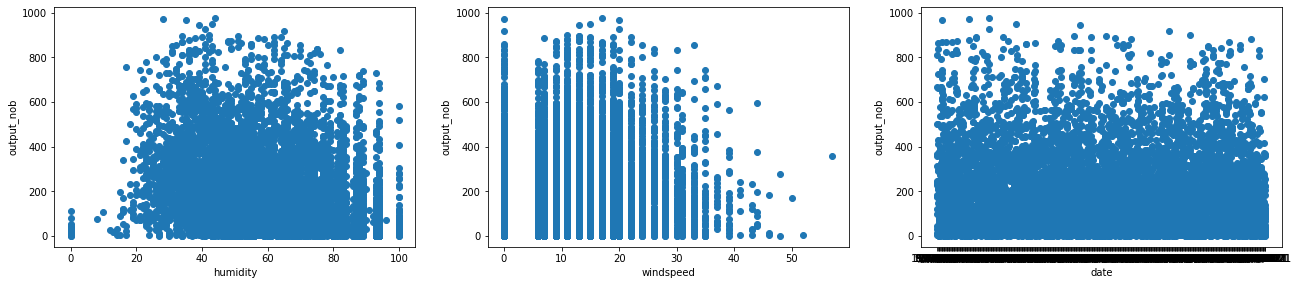

In [238]:
plt.figure(figsize=(22,15))
plotnumber=1

for column in continous_data.columns[:-1]:
    ax=plt.subplot(3,3,plotnumber)
    plt.scatter(continous_data[column],continous_data.iloc[:,-1])
    plt.xlabel(column)
    plt.ylabel(continous_data.columns[-1])
    plotnumber+=1
#all parameters shows nearly linear relationships so no need for the data-transformation  

C:\Users\aman7\anaconda3\envs\cuda_tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aman7\anaconda3\envs\cuda_tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


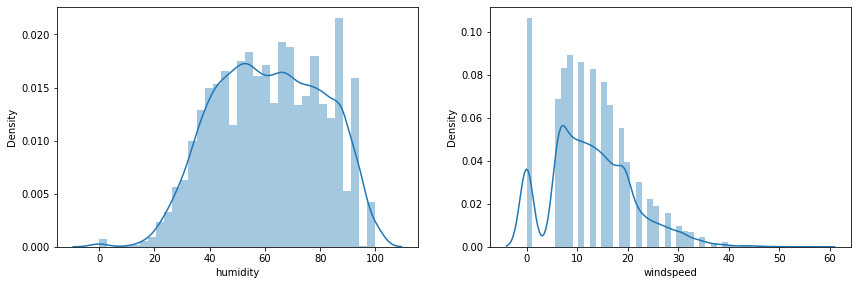

In [240]:
#outliers check
plt.figure(figsize=(22,15))
plotnumber=1

for column in continous_data.columns[:-2]:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(continous_data[column])
    plt.xlabel(column)
    plotnumber+=1

In [241]:
def detect_outliers(feature):
    outliers=[]
    data=continous_data[feature]
    mean=np.mean(data)
    std=np.std(data)
    
    
    for y in data:
        z_score=(y-mean)/std
        if z_score> 3:
            outliers.append(y)
    print('outliers caps for {}'.format(feature))
    print('  --95p:{:.1f}/ {} value exceed that'.format(data.quantile(.95),len([i for i in data if i> data.quantile(.95)])))
    print('  --99p:{:.1f}/ {} value exceed that'.format(data.quantile(.99),len([i for i in data if i> data.quantile(.99)])))
    print('---3sd:{:.1f}/{} value exceed that'.format((mean+3*(std)),len(outliers)))
    print('values exceed 3sd are outliers')
    print()

for i in continous_columns[:-2]:
    detect_outliers(i)

#need to remove outliers from windspeed

outliers caps for humidity
  --95p:93.0/ 356 value exceed that
  --99p:100.0/ 0 value exceed that
---3sd:119.2/0 value exceed that
values exceed 3sd are outliers

outliers caps for windspeed
  --95p:28.0/ 354 value exceed that
  --99p:35.0/ 67 value exceed that
---3sd:37.4/48 value exceed that
values exceed 3sd are outliers



In [242]:
#removing outliers from windspeed and change in clean data
clean_data['windspeed'].clip(upper=clean_data['windspeed'].quantile(.99),inplace=True)

# analysis of categorical data

In [243]:
category_data.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          3
hours         0
month         0
weekday       0
output_nob    0
dtype: int64

In [244]:
clean_data[category_data.temp.isnull()==True]

,season,holiday,workingday,weather,temp,humidity,windspeed,hours,date,month,weekday,output_nob
172,Winter,0,0,"Light Snow, Light Rain",NaN,93,8.9981,17,12/9/2012,12,6,229
269,Winter,0,0,Clear + Few clouds,NaN,56,16.9979,5,11/19/2011,11,5,2
406,Fall,0,0,Clear + Few clouds,NaN,42,19.9995,12,8/7/2011,8,6,370


In [245]:
#lets fill the temp nan value with the most common value
clean_data.fillna(clean_data.temp.value_counts().index[0],inplace=True)
category_data.fillna(clean_data.temp.value_counts().index[0],inplace=True)

C:\Users\aman7\anaconda3\envs\cuda_tf_gpu\lib\site-packages\pandas\core\frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [246]:
#unique values till now 
for i in category_columns[:-1]:
    print('unique values of {}'.format(i))
    print(category_data[i].nunique())
    print('*'*10)

unique values of season
4
**********
unique values of holiday
2
**********
unique values of workingday
2
**********
unique values of weather
4
**********
unique values of temp
55
**********
unique values of hours
24
**********
unique values of month
12
**********
unique values of weekday
7
**********


### note- assuming temp to make it continous factor used to refactor the model if dont get better result

<Figure size 2160x5760 with 0 Axes>

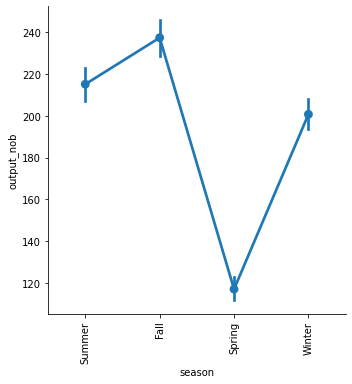

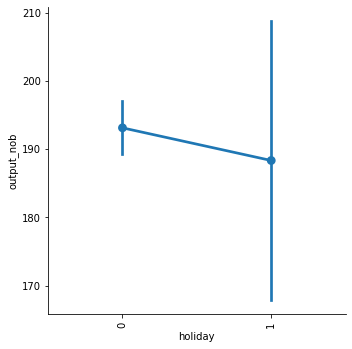

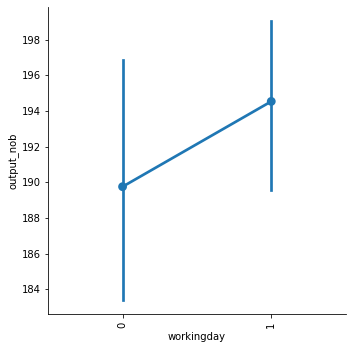

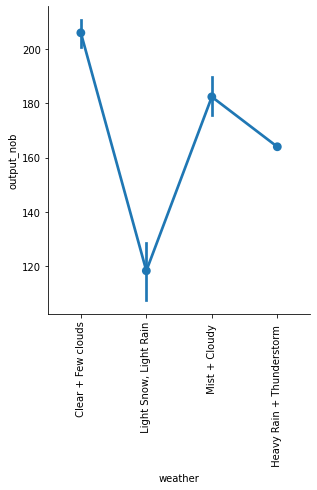

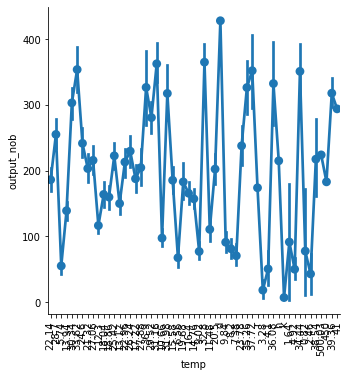

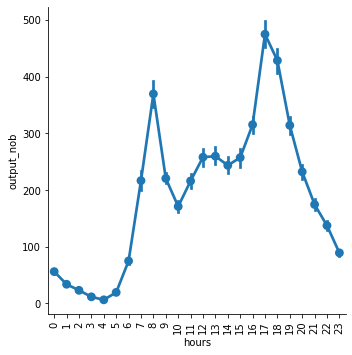

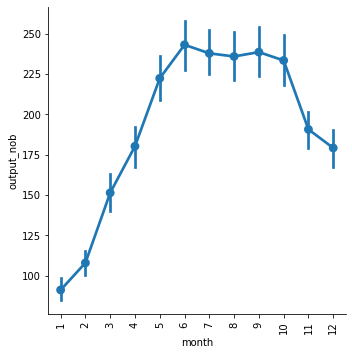

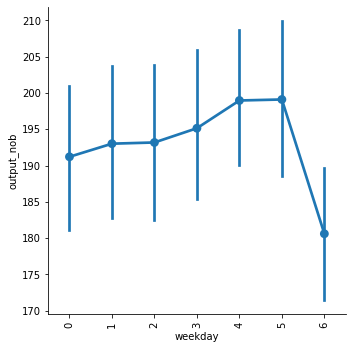

In [253]:

for i in category_columns[:-1]:
    g=sns.catplot(x=i,y='output_nob',data=category_data,kind='point')
    g.set_xticklabels(rotation=90)
    plt.show()



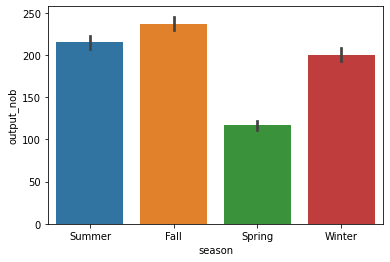

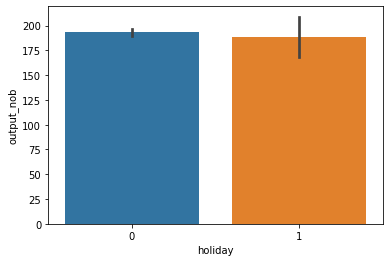

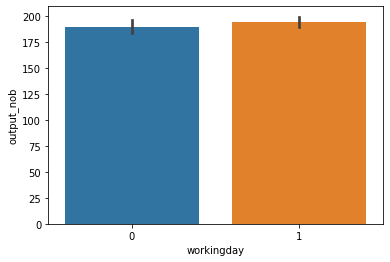

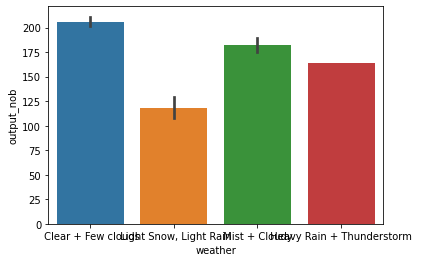

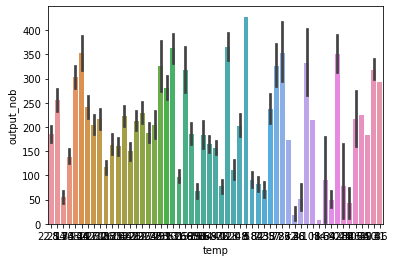

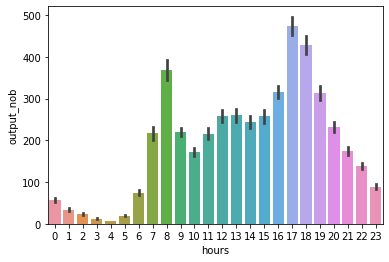

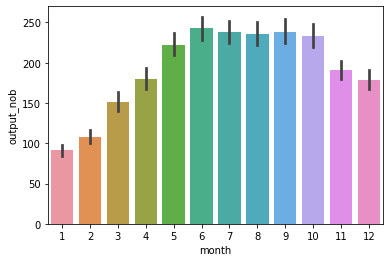

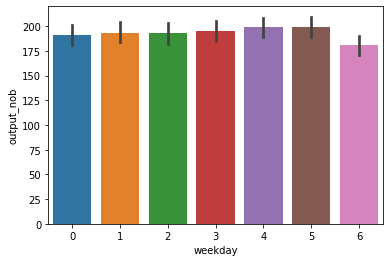

In [284]:

for i in category_columns[:-1]:
    g=sns.barplot(x=i,y='output_nob',data=category_data)
    
    plt.show()

<AxesSubplot:>

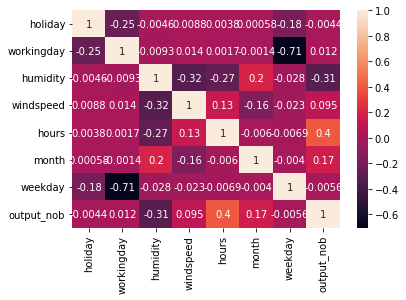

In [254]:
sns.heatmap(clean_data.corr(),annot=True)

#clearly only workingday and weekday are correlated ,also output is having least affected by both 

#but final recommedation would be to try with eliminate workingday to avoid multicorrelation  also.
#also date columns is not required as well for now

In [287]:
#going to create to 3 datasets
clean_data.to_csv('final_clean_data.csv',columns=['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'hours',
 'month',
 'weekday','output_nob'],index=False)

clean_data.to_csv('final_clean_data_except_weekday.csv',columns=['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'hours',
 'month',
 'output_nob'],index=False)

clean_data.to_csv('final_clean_data_except_workingday.csv',columns=['season',
 'holiday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'hours',
 'month',
 'weekday','output_nob'],index=False)

# Model Processing

In [157]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
import xgboost as xg
from sklearn.preprocessing import LabelEncoder,StandardScaler
import joblib
import pickle

In [294]:
def data_preprocess(data_file):
    #dataframe loading
    data=pd.read_csv(data_file+'.csv')
    
    #label encoding for categorical values
    for i in data.columns:
        if i in ['season','weather', 'temp']:
            le=LabelEncoder()
            le.fit(data[i])
            data[i]=le.transform(data[i])
            #joblib.dump(le,'model_'+data_file+'_'+i+'_le.pkl')
            print('labelencoding for {} done'.format(i))

    #train,test,val split        
    x_train,x_test,y_train,y_test=train_test_split(data.iloc[:,:-1],data['output_nob'],test_size=0.4,random_state=10)
    x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.5,random_state=6)
    #scaling the data
    ss=StandardScaler()
    x_train=ss.fit_transform(x_train)
    x_val=ss.transform(x_val)
    x_test=ss.transform(x_test)
    #joblib.dump(ss,'model_'+data_file+'_ss.pkl')
    return x_train,x_test,x_val,y_train,y_test,y_val



#to check which is better for furthur hyperparameter tunning with what best dataset
models=[LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor(),xg.XGBRFRegressor()
       ,SVR(),KNeighborsRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

# focused over validation r2_score
best_dataset=None
best_score_model=None
best_score=0

# iterating over all datasets available
for i in ['final_clean_data','final_clean_data_except_weekday','final_clean_data_except_workingday']:
    print('evaluating dataset {}'.format(i))
    x_train,x_test,x_val,y_train,y_test,y_val=data_preprocess(i)
    
    print()
    best_r2_score=0
    best_model=None
    
    #iterating over all available models
    for j in models:
        print('model---{}'.format(j))
        
        #training
        model_use=j
        model_use.fit(x_train,y_train)
        y_pred_train=model_use.predict(x_train)
        y_pred_val=model_use.predict(x_val)
        
        #metrics
        print('r2_score for train and val')
        print(metrics.r2_score(y_train,y_pred_train))
        print(metrics.r2_score(y_val,y_pred_val))

        print('mse for train and val')
        print(metrics.mean_squared_error(y_train,y_pred_train))
        print(metrics.mean_squared_error(y_val,y_pred_val))
        print('*'*10)
        
        if best_r2_score<metrics.r2_score(y_val,y_pred_val):
            best_r2_score=metrics.r2_score(y_val,y_pred_val)
            best_model=j
    
    print()
    print('best model for {} is {}'.format(i,best_model))
    print('-'*10)
    
    if best_r2_score>best_score:
        best_score=best_r2_score
        best_dataset=i
        best_score_model=best_model

print('////'*10)
print('final verdict for validation data')
print('best dataset--{}'.format(best_dataset))
print('best model--{}'.format(best_score_model))
print('best score--{}'.format(best_score))

    
    


evaluating dataset final_clean_data
labelencoding for season done
labelencoding for weather done
labelencoding for temp done

model---LinearRegression()
r2_score for train and val
0.2605359223637279
0.2811088641550511
mse for train and val
24354.93072416296
23184.37891204419
**********
model---DecisionTreeRegressor()
r2_score for train and val
0.9997690245587406
0.7442760502908182
mse for train and val
7.60738897396631
8247.147101033295
**********
model---RandomForestRegressor()
r2_score for train and val
0.9784811110459325
0.8590318619175261
mse for train and val
708.7444347703122
4546.249862975555
**********
model---XGBRFRegressor(base_score=None, booster=None, colsample_bylevel=None,
               colsample_bytree=None, enable_categorical=False, gamma=None,
               gpu_id=None, importance_type=None, interaction_constraints=None,
               max_delta_step=None, max_depth=None, min_child_weight=None,
               missing=nan, monotone_constraints=None, n_estimators=100,


In [296]:
#hyperparameter tunning over randomforestregressor
x_train,x_test,x_val,y_train,y_test,y_val=data_preprocess('final_clean_data')
parameters={
    'max_depth': [10,20,30,40,None],
    'n_estimators': [50,100,300, 500, 1000]
}
alg=RandomForestRegressor()
model_gra= RandomizedSearchCV(alg,parameters,n_jobs=-1)

model_gra.fit(x_train,y_train)
print(model_gra.best_params_)

model_gra=model_gra.best_estimator_
y_pred_train=model_gra.predict(x_train)
y_pred_val=model_gra.predict(x_val)

print(metrics.r2_score(y_train,y_pred_train))
print(metrics.r2_score(y_val,y_pred_val))

joblib.dump(model_gra,'model.pkl')

labelencoding for season done
labelencoding for weather done
labelencoding for temp done
{'n_estimators': 1000, 'max_depth': 20}
0.9783967383991434
0.8578379709324322


In [303]:
# for test data score 
y_pred_test=model_gra.predict(x_test)
print('test score result')
print(metrics.r2_score(y_test,y_pred_test))
print(metrics.mean_squared_error(y_test,y_pred_test))

test score result
0.8557336413581513
4862.094412300346
